Imported all the required libraries


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import keras
import nltk


from nltk import sent_tokenize
from nltk import word_tokenize
#from numpy import arrays
from keras.models import Sequential
from keras.layers.core import Activation,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


#plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Global parameters
STOPWORDS = set(stopwords.words('english'))

nltk.download("popular")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

Reading the data file

In [ ]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

to view top five bottom five rows of data in the given data set

In [ ]:
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


counting distinct values on column 'label'

In [ ]:
Data.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


Data type of each column

In [ ]:
Data.dtypes

id        int64
label     int64
tweet    object
dtype: object

view of a tweet

In [ ]:
Data['tweet'][4]

' factsguide: society now    #motivation'

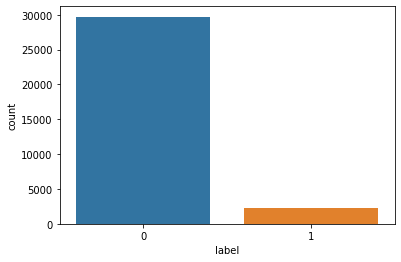

In [ ]:
sns.countplot(x='label',data=Data)

deleting id column

In [ ]:
del Data['id']

review the data

In [ ]:
Data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Defining a function to process the tweets

In [ ]:
def remove_symb(tweet):

  #changes in lower case
  tweet.lower()
  #regular expression is used to remove urls punctuations and all
  #removes user references and #from tweet
  tweet=re.sub(r'\@\w+|\#','',tweet)
  #used to remove urls
  tweet=re.sub(r"http\S+|www\S+|https\S+",'',tweet,flags=re.MULTILINE)
  #used to remove punctuations
  tweet=tweet.translate(str.maketrans('','',string.punctuation))
  #used to remove multisapces
  tweet=re.sub(r'\s+',' ',tweet)
  #used to remove single characters
  tweet=re.sub(r'\s+[a-zA-Z]\s+',' ',tweet)
  #converting in list
  tweet=list(tweet.split(" "))
  # to remove stop words
  filtered_words=[w for w in tweet if not w in STOPWORDS]
  #printing only filtered words
  #removing numeric from given data sets
  alpha_words=[w for w in filtered_words if w.isalpha()]
  return " ".join(alpha_words)

creating a list to store clean tweets after passing each to remove_symb function

In [ ]:
lst=[]
sentences=list(Data['tweet'])
for sen in sentences:
  lst.append(remove_symb(sen))

In [28]:
#PoS tagging :


sentence = lst[5]

#Tokenizing words :
tokenized_words = word_tokenize(sentence)

for words in tokenized_words:
    tagged_words = nltk.pos_tag(tokenized_words)
    
tagged_words

[('huge', 'JJ'),
 ('fan', 'NN'),
 ('fare', 'NN'),
 ('big', 'JJ'),
 ('talking', 'VBG'),
 ('leave', 'JJ'),
 ('chaos', 'NN'),
 ('pay', 'NN'),
 ('disputes', 'NNS'),
 ('get', 'VBP'),
 ('allshowandnogo', 'JJ')]

In [29]:
# TFIDF example 
#Import required libraries :
from sklearn.feature_extraction.text import TfidfVectorizer

#Sentences for analysis :

sentences = [lst[5]]
#Create an object :
vectorizer = TfidfVectorizer(norm = None)

#Generating output for TF_IDF :
X = vectorizer.fit_transform(sentences).toarray()

#Total words with their index in model :
print(vectorizer.vocabulary_)
print("\n")

#Features :
print(vectorizer.get_feature_names())
print("\n")

#Show the output :
print(X)

{'huge': 7, 'fan': 4, 'fare': 5, 'big': 1, 'talking': 10, 'leave': 8, 'chaos': 2, 'pay': 9, 'disputes': 3, 'get': 6, 'allshowandnogo': 0}


['allshowandnogo', 'big', 'chaos', 'disputes', 'fan', 'fare', 'get', 'huge', 'leave', 'pay', 'talking']


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


To check whether there are any missing values or numm values.

In [30]:
Data.isnull().values.any()

False

In [ ]:
print(lst[1:10])

['thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked', 'bihday majesty', 'model love take time', 'factsguide society motivation', 'huge fan fare big talking leave chaos pay disputes get allshowandnogo', 'camping tomorrow', 'next school year year cant think school exams hate imagine actorslife revolutionschool girl', 'love land allin cavs champions cleveland clevelandcavaliers', 'welcome im']


classifier storing it on array

In [ ]:
y=np.array(list(Data['label']))

spliting data in train and test

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(lst,y,test_size=0.40,random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(np.unique(y))

19177
12785
[0 1]


setting size of vocab for tokeniezer and converts a list of sequences into numpy matrix in binary mode

In [ ]:
vocab_size=5000
tokenizer=Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)


X_train=tokenizer.texts_to_matrix(X_train,mode = 'binary')
X_test=tokenizer.texts_to_matrix(X_test,mode='binary')

converting output to catogerical value, we know we have two catogery here

In [ ]:
import tensorflow as tf
from keras import utils as np_utils 

Y_train =  tf.keras.utils.to_categorical(Y_train, 2)
Y_test = tf.keras.utils.to_categorical(Y_test, 2)

In [ ]:
print(X_train.shape)

(19177, 5000)


In [ ]:
len(tokenizer.word_index)

27194

defining a model using keras library using 2 dense and 2 activation function.

In [ ]:
maxwords=5000
model=Sequential()
model.add(Dense(512,input_shape=(maxwords,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

compiling and building a model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.metrics_names)

[]


it prints model summary

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 2,561,538
Trainable params: 2,561,538
Non-trainable params: 0
_________________________________________________________________
None


Training the model

In [ ]:
batch_size=32
epochs=10
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
score=model.evaluate(X_test,Y_test,batch_size=batch_size,verbose=1)
print(score[0])
print(score[1])


Epoch 1/10
540/540 [==============================] - 11s 19ms/step - loss: 0.1859 - accuracy: 0.9417 - val_loss: 0.1335 - val_accuracy: 0.9572
Epoch 2/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0875 - accuracy: 0.9693 - val_loss: 0.1328 - val_accuracy: 0.9567
Epoch 3/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0485 - accuracy: 0.9831 - val_loss: 0.1442 - val_accuracy: 0.9588
Epoch 4/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0280 - accuracy: 0.9911 - val_loss: 0.1575 - val_accuracy: 0.9583
Epoch 5/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.1823 - val_accuracy: 0.9546
Epoch 6/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0124 - accuracy: 0.9968 - val_loss: 0.1966 - val_accuracy: 0.9567
Epoch 7/10
540/540 [==============================] - 10s 19ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.2124 - val_accuracy:

Listing all data in history

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


summarizing history for accuracy

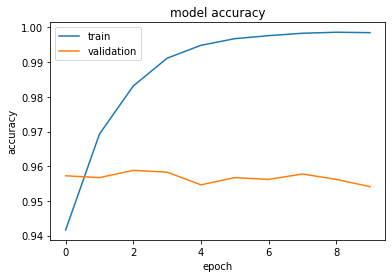

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


summerizing history for loss

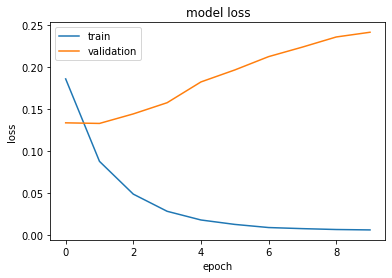

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [36]:
# Model evaluation
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.55%
